**Prediction using Supervised ML**



In [20]:
# IMPORTING ALL THE REQUIRED LIBRARIES LIKE PANDAS, NUMPY, MATPLOTLIB, SEABORN, SKLEARN, MATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
import math


In [21]:
# READ A CSV FILE 

Link = "http://bit.ly/w-data"
df = pd.read_csv(Link)
print("Data from a CSV File Read Successfully")

Data from a CSV File Read Successfully


In [22]:
# PRINT FIRST 5 RECORDS IN THE FILE

df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
# CHECKING IF DATA CONSISTS ANY NULL VALUE

df.isnull == True 

False

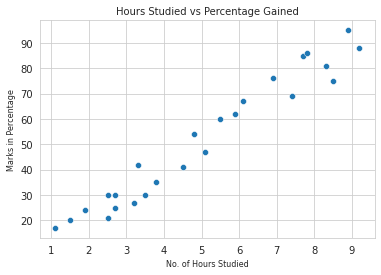

In [24]:
# PLOT THE SCORES DISTRIBUTION IN ORDER TO FIND RELATION BETWEEN THE DATA

sns.set_style('whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Hours Studied vs Percentage Gained',size=10)
plt.ylabel('Marks in Percentage', size=8)
plt.xlabel('No. of Hours Studied', size=8)
plt.show()

**FROM ABOVE PLOT WE CAN CLEARLY DETERMINE THAT THERE IS A POSITIVE LINEAR RELATION BETWEEN NO. OF HOURS STUDIED AND MARKS IN PERCENTAGE OBTAINED BY STUDENT**

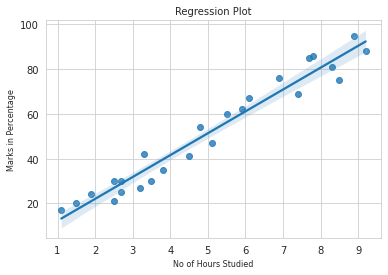

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [25]:
# REGRESSION PLOT 

sns.set_style('whitegrid')
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=10)
plt.ylabel('Marks in Percentage', size=8)
plt.xlabel('No of Hours Studied', size=8)
plt.show()
print(df.corr())

**REGRESSION PLOT PROVES THE POSITIVE CORELATION BETWEEN THE ABOVE DATA**

**1.**   **DATA PREPARATION**




In [26]:
# DIVIDE DATA INTO ATTRIBUTES(INPUTS) AND LABELS(OUTPUTS)

X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [27]:
# SPLITTING DATA INTO TRAINING AND TESTING DATASETS

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


**2.   TRAINING THE ALGORITHM**



In [28]:
# TRAINING THE MODEL USING LINEAR REGRESSION ALGORITHM

regression = LinearRegression()
regression.fit(X_train, Y_train)
print("Successful completion of training the model")

Successful completion of training the model


In [29]:
# TRAINING THE MODEL USING LASSO REGRESSION

Las = linear_model.Lasso(alpha=0.1)
Las.fit(X_train, Y_train)
print("Successful completion of training the model")

Successful completion of training the model


In [30]:
# TRAINING THE MODEL USING RIDGE REGRESSION

Rid = Ridge(alpha=1.0)
Rid.fit(X_train, Y_train)
print("Successful completion of training the model")

Successful completion of training the model


**3.   MAKING PREDICTION**


In [31]:
# PRINTING TESTING DATA

print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
# PREDICTING THE SCORES USING LINEAR REGRESSION

Y_prediction = regression.predict(X_test)
prediction1 = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in Y_prediction]})
prediction1

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [33]:
# PREDICTING THE SCORES USING LASSO REGRESSION
 
Y_predict = Las.predict(X_test)
prediction2 = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in Y_predict]})
prediction2

,Hours,Predicted Marks
0,1.5,16.944678
1,3.2,33.765279
2,7.4,75.322057
3,2.5,26.839149
4,5.9,60.480351


In [34]:
# PREDICTING THE SCORES USING LASSO REGRESSION
 
Y_pred = Rid.predict(X_test)
prediction3 = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in Y_pred]})
prediction3

,Hours,Predicted Marks
0,1.5,17.181700
1,3.2,33.894564
2,7.4,75.185168
3,2.5,27.012796
4,5.9,60.438524


In [35]:
# COMPARING ACTUAL WITH PREDICTED VALUE FOR LINEAR REGRESSION

LI_Scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': Y_prediction})
LI_Scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
# COMPARING ACTUAL WITH PREDICTED VALUE FOR LASSO REGRESSION

LA_Scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': Y_predict})
LA_Scores

,Actual Marks,Predicted Marks
0,20,16.944678
1,27,33.765279
2,69,75.322057
3,30,26.839149
4,62,60.480351


In [37]:
# COMPARING ACTUAL WITH PREDICTED VALUE FOR RIDGE REGRESSION

R_Scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': Y_pred})
R_Scores

,Actual Marks,Predicted Marks
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


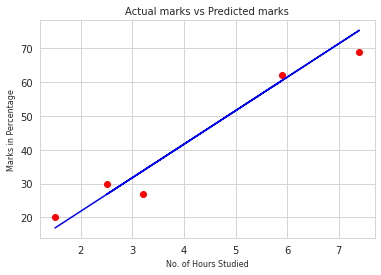

In [38]:
# VISUALLY COMPARING ACTUAL WITH PREDICTED VALUE

plt.scatter(x=X_test, y=Y_test, color='Red')
plt.plot(X_test, Y_prediction, color='Blue')
plt.title('Actual marks vs Predicted marks', size=10)
plt.ylabel('Marks in Percentage', size=8)
plt.xlabel('No. of Hours Studied', size=8)
plt.show()

**4.   MODEL EVALUATION**

In [39]:
# CALCULATING THE ACCURACY OF THE MODEL FOR LINEAR REGRESSION
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_prediction))
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_prediction))
print('Root Mean Square Error: ', math.sqrt(mean_squared_error(Y_test, Y_prediction)))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Square Error:  4.647447612100373


In [40]:
# CALCULATING THE ACCURACY OF THE MODEL FOR LASSO REGRESSION
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_predict))
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_predict))
print('Root Mean Square Error: ', math.sqrt(mean_squared_error(Y_test, Y_predict)))

Mean Absolute Error:  4.164631619836858
Mean Squared Error:  21.474542604804267
Root Mean Square Error:  4.634063293137489


In [41]:
# CALCULATING THE ACCURACY OF THE MODEL FOR RIDGE REGRESSION
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_pred))
print('Root Mean Square Error: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error:  4.089342367221116
Mean Squared Error:  21.019144027277527
Root Mean Square Error:  4.584664003749624


**PREDICTED SCORE WHEN STUDENT STUDIES FOR 9.25 HRS/DAY**

In [42]:
# PREDICTING THE PERCENTAGE WHEN HOUR=9.25

Hours = [9.25]
Predicted_percentage = regression.predict([Hours])
print("Predicted Score = {}".format(Predicted_percentage[0],3))

Predicted Score = 93.69173248737539


In [43]:
Hours = [9.25]
Predicted_percentage = Las.predict([Hours])
print("Predicted Score = {}".format(Predicted_percentage[0],3))

Predicted Score = 93.62682895247963


In [44]:
Hours = [9.25]
Predicted_percentage = Rid.predict([Hours])
print("Predicted Score = {}".format(Predicted_percentage[0],3))

Predicted Score = 93.37269603750562


**TO CONCLUDE, AFTER SPENDING 9.25 HOURS STUDYING, IT IS LIKELY THAT THE STUDENT GETS 93.69%, 93.62% AND 93.37% MARKS WHEN USED LINEAR, LASSO AND RIDGE REGRESSION RESPECTIVELY**